# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [3]:
# Put your EDA code here
north_df.columns, south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

(Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
        'During Call Wait Time', 'Calls'],
       dtype='object'),
 None)

In [7]:
#1. How many reps are in each branch?

north_df["Rep ID"].value_counts().count(), south_df["Rep ID"].value_counts().count()

(9, 11)

In [5]:
#2. busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch 
north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean(), south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

(Busy Minutes             9.987755
 Not Ready Minutes        1.914286
 Incoming Wait Time       3.048780
 During Call Wait Time    2.967347
 dtype: float64,
 Busy Minutes             10.054140
 Not Ready Minutes         1.910828
 Incoming Wait Time        3.000000
 During Call Wait Time     3.076433
 dtype: float64)

In [12]:
#3. What is the number of calls taken for each time block?
north_df["Time Block"].describe(), south_df["Time Block"].describe()

(count          245
 unique           9
 top       12:00 PM
 freq            45
 Name: Time Block, dtype: object,
 count          314
 unique           9
 top       12:00 PM
 freq            75
 Name: Time Block, dtype: object)

In [13]:
north_df.columns, south_df.columns

(Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
        'During Call Wait Time', 'Calls'],
       dtype='object'),
 Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
        'During Call Wait Time', 'Calls'],
       dtype='object'))

In [14]:
north_df["Rep ID"].value_counts(), south_df["Rep ID"].value_counts()


(Brent     37
 Lilly     30
 Todd      29
 Duke      29
 Joe       26
 Cam       24
 Xander    24
 Andy      23
 Amanda    23
 Name: Rep ID, dtype: int64,
 Eric      35
 Randy     33
 Sandy     32
 Helga     31
 Kate      29
 George    29
 Karl      28
 Susan     26
 Josh      26
 Sharon    25
 Alice     20
 Name: Rep ID, dtype: int64)

In [15]:
north_df["Time Block"].value_counts(), south_df["Time Block"].value_counts()

(12:00 PM    45
 10:00 AM    43
 2:00 PM     35
 3:00 PM     30
 4:00 PM     28
 11:00 AM    25
 1:00 PM     17
 5:00 PM     17
 9:00 AM      5
 Name: Time Block, dtype: int64,
 12:00 PM    75
 10:00 AM    56
 3:00 PM     43
 11:00 AM    31
 2:00 PM     30
 5:00 PM     26
 4:00 PM     25
 1:00 PM     23
 9:00 AM      5
 Name: Time Block, dtype: int64)

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
North: 9,South: 11
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
Busy Minutes: North 9.987755, South 10.054140
Not Ready Minutes: North 1.914286, South 1.910828
Incoming Wait Time: 3.048780, South 3.000000
During Call Wait Time: North 2.967347, South 3.076433
3. What is the number of calls taken for each time block?
North: 
12:00 PM    45
 10:00 AM    43
 2:00 PM     35
 3:00 PM     30
 4:00 PM     28
 11:00 AM    25
 1:00 PM     17
 5:00 PM     17
 9:00 AM      5

South:
 12:00 PM    75
 10:00 AM    56
 3:00 PM     43
 11:00 AM    31
 2:00 PM     30
 5:00 PM     26
 4:00 PM     25
 1:00 PM     23
 9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [16]:
# Clean your data here
duplicate_rows_df = north_df[north_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape), 
duplicate_rows_df = south_df[south_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape), 

Number of duplicated rows:  (0, 15)
Number of duplicated rows:  (0, 15)


(None,)

In [17]:
#Missing Data?
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))), 
    
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


<AxesSubplot:>

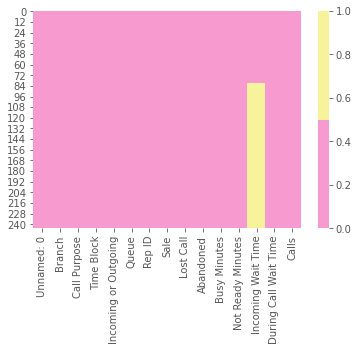

In [18]:
cols = north_df.columns[:30]
colors = ['#f79acf', '#f7f39a']
sns.heatmap(north_df[cols].isnull(), cmap = sns.color_palette(colors))

<AxesSubplot:>

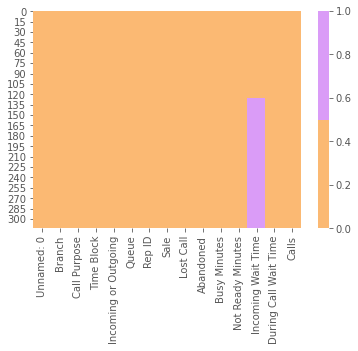

In [19]:
cols = south_df.columns[:30]
colors = ['#fbb973', '#da9cf7']
sns.heatmap(south_df[cols].isnull(), cmap = sns.color_palette(colors))

created missing indicator for: Incoming Wait Time


<AxesSubplot:xlabel='index'>

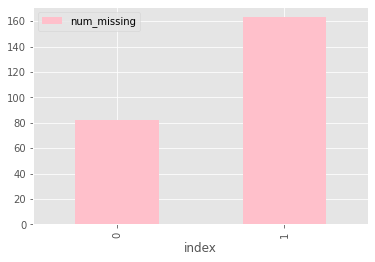

In [20]:
for col in north_df.columns:
    missing = north_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        north_df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in north_df.columns if 'ismissing' in col]
north_df['num_missing'] = north_df[ismissing_cols].sum(axis=1)

north_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing', color='pink')



In [19]:
#Creating subset as Aliya suggested.

block.iloc[[0,1,3,6],[0,2]]



pandas.dataframe.iloc[]

SyntaxError: invalid syntax (<ipython-input-19-8f11145fc954>, line 1)

In [15]:
#Aliya's Note: Data Cleaning 2) How can we consolidate the "Yes" values so that we're not losing data? 
#That would allow for more accurate analysis. 

pd.concat([north_df['Sale'].value_counts() for column in north_df], axis = 1)

,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale
NO,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
YES,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [17]:
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [14]:
pd.concat([south_df['Sale'].value_counts() for column in south_df], axis = 1)

,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale,Sale
NO,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
YES,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [18]:
south_df['Sale'].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [17]:
north_df.drop_duplicates()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,0,0,11,2,NaN,2,1


In [16]:
south_df.drop_duplicates()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [30]:
#Aliya's note, hoping I've done this correctly:
#"Create a subset of the data frame with the columns I need and assign that to a new object. 
#I prefer to keep the original data frame intact in case I ever need to double-check the information.""

north_df1 = ['Unnamed', 'Branch', 'Call Purpose' ,'Time Block', 'Incoming or Outgoing', 'Rep ID', 'Sale', 'Lost Call',
            'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time', 'Calls']

north_1=pd.DataFrame([north_df1])


    

In [31]:
south_df1 = ['Unnamed', 'Branch', 'Call Purpose' ,'Time Block', 'Incoming or Outgoing', 'Rep ID', 'Sale', 'Lost Call',
            'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time', 'Calls']

south_1=pd.DataFrame([south_df1])


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [32]:
#1: No.
#2: I believe there are 2 different values based on call purpose, either product support or sales support. 
#I concatenated the data based on the 'Yes' value.
#3: No duplicates found
#Number of duplicated rows:  (0, 15)
#Number of duplicated rows:  (0, 15)
#4: Per Aliya's advice, I created a subset of the data as it's own data frame 
#without Queue.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [37]:
# Manipulate data here
Combineddf = north_df.append(south_df, ignore_index=True)

In [28]:
north_df.groupby("Rep ID")["Calls"].value_counts(), south_df.groupby("Rep ID")["Calls"].value_counts()

(Rep ID  Calls
 Amanda  1        23
 Andy    1        23
 Brent   1        37
 Cam     1        24
 Duke    1        29
 Joe     1        26
 Lilly   1        30
 Todd    1        29
 Xander  1        24
 Name: Calls, dtype: int64,
 Rep ID  Calls
 Alice   1        20
 Eric    1        35
 George  1        29
 Helga   1        31
 Josh    1        26
 Karl    1        28
 Kate    1        29
 Randy   1        33
 Sandy   1        32
 Sharon  1        25
 Susan   1        26
 Name: Calls, dtype: int64)

In [35]:
#Average abandonment rate
x = north_df["Abandoned"].mean()
x
XPercent = x * 100
XPercent

2.857142857142857

In [36]:
y = south_df["Abandoned"].mean()
y
YPercent = y * 100
YPercent

1.2738853503184715

In [54]:
#Average abandonment rate for entire company:
z = Combineddf["Abandoned"].mean()
z
z * 100

1.9677996422182469

In [35]:
north_df["Incoming Wait Time"].value_counts() #245


4.0    20
5.0    17
1.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [36]:
16 / 245 * 100

6.530612244897959

In [37]:
south_df["Incoming Wait Time"].value_counts()

(4.0    30
 3.0    29
 2.0    28
 1.0    20
 5.0    19
 Name: Incoming Wait Time, dtype: int64,)

In [38]:
28 / 314 * 100

8.9171974522293

In [49]:
Combineddf["Incoming Wait Time"].value_counts()

(4.0    50
 2.0    44
 3.0    41
 1.0    37
 5.0    36
 Name: Incoming Wait Time, dtype: int64,)

In [41]:
#Calls answered within 2 seconds to meet KPI.
ideal_time_frame = Combineddf[Combineddf['Incoming Wait Time'] <= 2.0]
ideal_time_frame

#service_level = ('Calls'/'Incoming Wait Time')*100
Service_level = ideal_time_frame[['Branch', 'Incoming Wait Time','Calls']].groupby('Branch').sum()
Service_level


,Incoming Wait Time,Calls
Branch,,
North,49.0,33
South,76.0,48


In [64]:
Ideal_KPI_N = (33 / 49)*100
Ideal_KPI_N

67.3469387755102

In [65]:
Ideal_KPI_S = (48 / 76) * 100
Ideal_KPI_S

63.1578947368421

In [66]:
Ideal_KPI = (81 / 125) * 100
Ideal_KPI

64.8

In [55]:
Avg_answer_speed = Combineddf[["Branch", "Incoming Wait Time"]].groupby('Branch').mean()
Avg_answer_speed

,Incoming Wait Time
Branch,
North,3.04878
South,3.00000


In [56]:
Combineddf["Incoming Wait Time"].mean()

3.019230769230769

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [67]:
#1. North: Brent at 37, South: Eric at 35
#2. North: 2.86%, South: 1.27%, Entire Co.: 1.97. Yes, the North branch.
#3. I re-did this one to get North: 67%, South: 63%, Entire Company: 65%
#4. North: 3.05 seconds, South: 3.0, Entire Co.: 3.02

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

Text(0, 0.5, 'Rate')

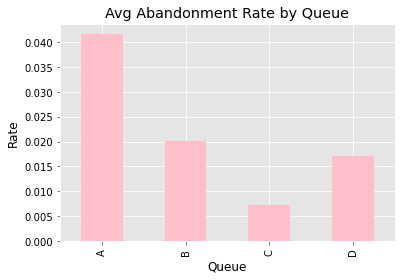

In [90]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = Combineddf.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
    
a_df = pd.DataFrame.from_dict(abandonment_rates, orient='index')
a_df.rename(columns = {0:'Abandonment Rate'}, inplace = True)

fig1 = a_df.plot(kind = 'bar', legend = False, color = 'pink')
plt.title('Avg Abandonment Rate by Queue',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Rate',color = 'black') 

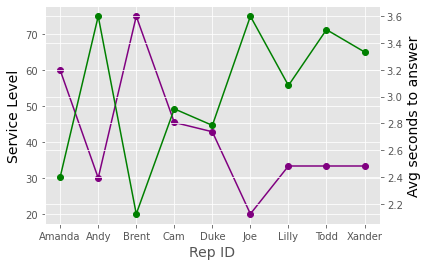

In [129]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# Create new table showing both service level and average speed of answer of each rep 
service_speed = pd.merge(service_level, north_plt, on="Rep ID")


fig,ax = plt.subplots()
ax.plot(service_speed['Rep ID'], service_speed['Service Level %'], color="purple", marker="o")
ax.set_xlabel('Rep ID', fontsize=14)
ax.set_ylabel('Service Level', color="Black", fontsize=14)

ax2 = ax.twinx()
ax2.plot(service_speed['Rep ID'], service_speed['Incoming Wait Time'],color="green",marker="o")
ax2.set_ylabel('Avg seconds to answer', color="black", fontsize=14)

plt.show()


array([[<AxesSubplot:title={'center':'Calls'}>]], dtype=object)

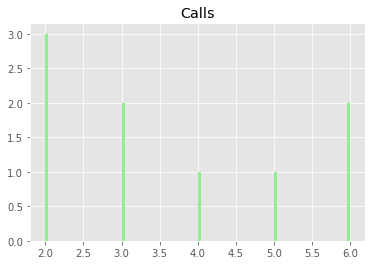

In [132]:
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls
# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

quick_stats.hist(bins=100, color = 'lightgreen')

<AxesSubplot:ylabel='Rep ID'>

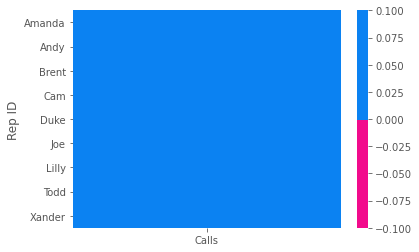

In [100]:
# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum()
total_stats

cols = total_stats.columns[:30]
colors = ['#f20b8c', '#0b82f2']
sns.heatmap(total_stats[cols].isnull(), cmap = sns.color_palette(colors))
# Final Table  

In [85]:
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level
# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


<AxesSubplot:xlabel='Call Purpose'>

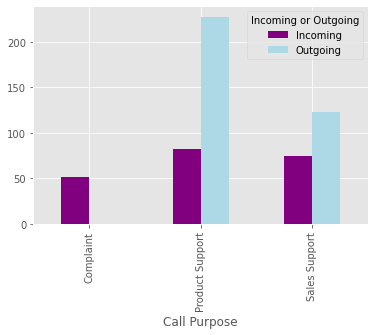

In [107]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose = Combineddf.groupby("Call Purpose")
purpose_counts = purpose["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

call_purpose = Combineddf.groupby("Incoming or Outgoing")["Call Purpose"].value_counts().unstack(0).plot.bar(color=['purple', 'lightblue'])
call_purpose

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [111]:
#1. South - Incoming Wait Time and Abandoned Calls are lower.
#2. North Branch could use more reps.
#3. Years of service might be interesting to determine if seniority was a factor in how quickly the reps worked. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [118]:
# Create your visualization here!
call_times = Combineddf[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times

# Use groupby to plot based on time blocks:
purpose = Combineddf.groupby("Call Purpose")

# Use groupby and get_group to select which call purpose to plot:
purpose.get_group(("Incoming or Outgoing")) 

purpose_counts = purpose["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

call_purpose = Combineddf.groupby("Incoming or Outgoing")["Call Purpose"].value_counts().unstack(0).plot.bar(color=['brown', 'green'])
call_purpose

KeyError: 'Incoming or Outgoing'